In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [2]:
df = pd.read_csv('BankChurn.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df = df.iloc[:, :-2]
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Análise Exploratória

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [5]:
# Certifica se ainda há algum valor Null

df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


C:\Users\Vlademir\AppData\Local\Temp\ipykernel_5980\1412395945.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdYlGn')


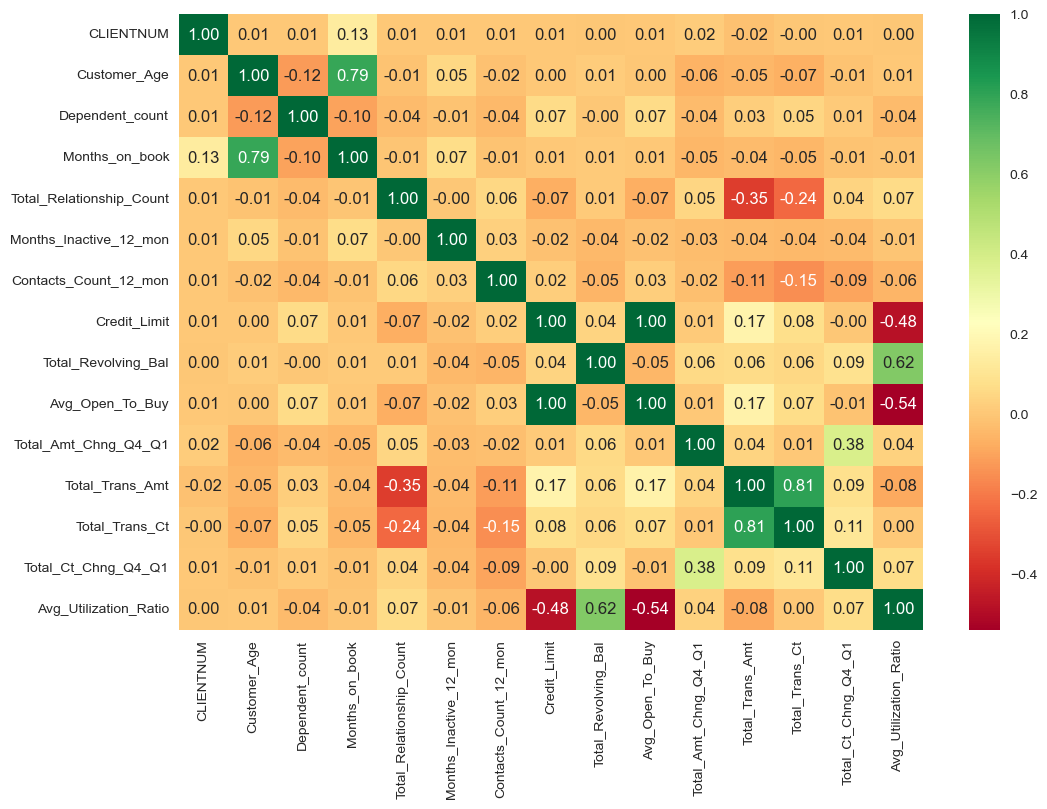

In [7]:
# Analisa a correlação entre cada feature a partir de um Mapa de Calor

fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdYlGn')

plt.show()

In [8]:
# Checando se há mais de um cliente com o mesmo número 

df['CLIENTNUM'].value_counts().max()

1

In [9]:
# Removendo feature CLIENTNUM para o treinamento

df.drop('CLIENTNUM', axis=1, inplace=True)

### Tratamendo de dados categóricos

In [10]:
categorical_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Card_Category', 'Income_Category'] 

df = pd.get_dummies(df, columns = categorical_cols)

### Aplicando Padronização e PCA

In [11]:
scaler = StandardScaler().fit_transform(df)

X = PCA(n_components=2, random_state=42).fit_transform(scaler)

### Determinando o Número de Centróides (K)

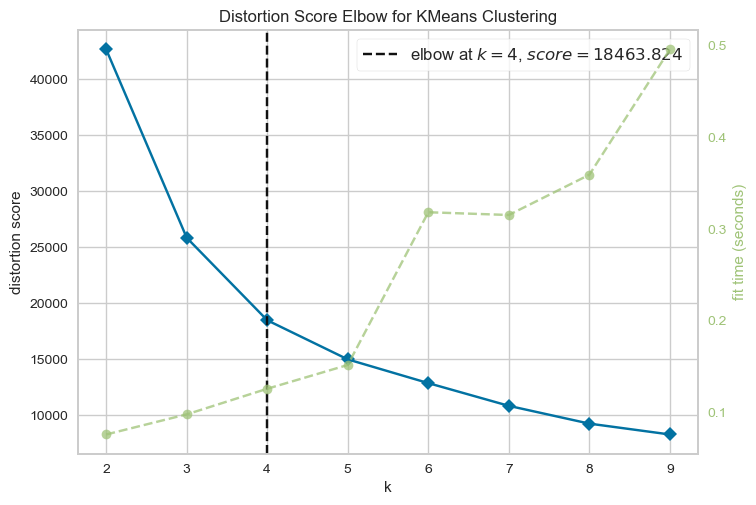

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,10))

visualizer.fit(X)
visualizer.show()    

Número de Clusters: 2 / Silhouette Score: 0.41748667113364313
Número de Clusters: 3 / Silhouette Score: 0.48658531210509276
Número de Clusters: 4 / Silhouette Score: 0.4677518093442396
Número de Clusters: 5 / Silhouette Score: 0.4795899966124311
Número de Clusters: 6 / Silhouette Score: 0.4329358270435586
Número de Clusters: 7 / Silhouette Score: 0.4505079793737104
Número de Clusters: 8 / Silhouette Score: 0.3878616476348153


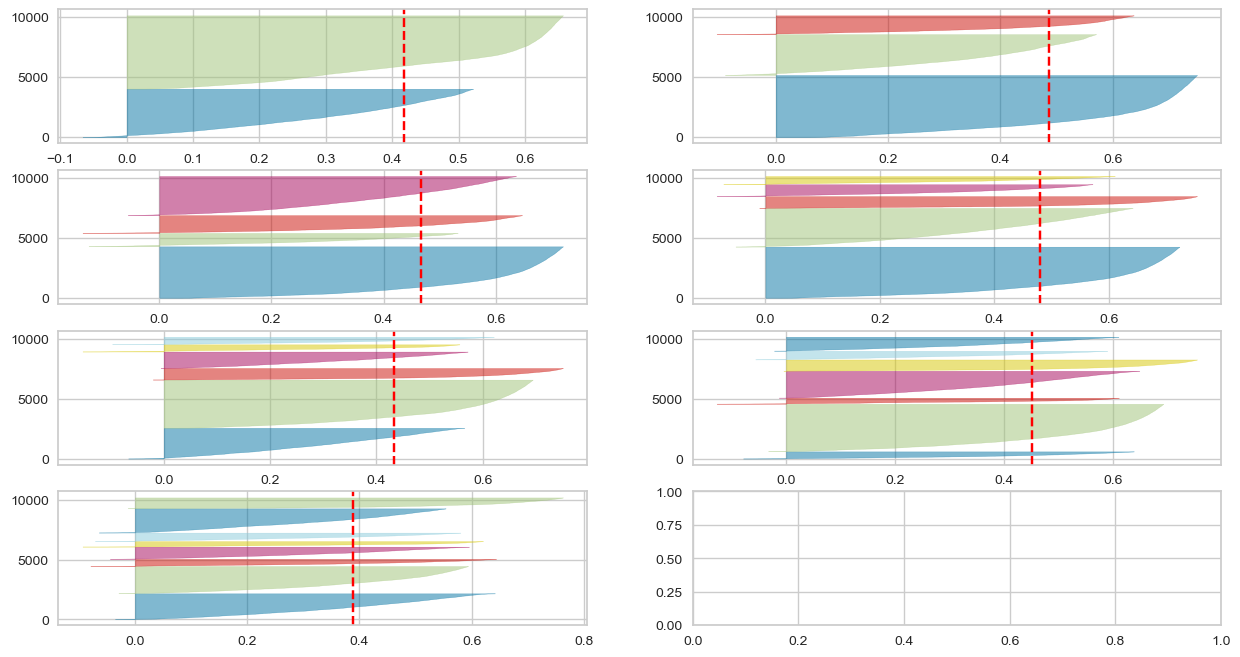

In [13]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))

for i in [2, 3, 4, 5, 6, 7, 8]:
    kmeans = KMeans(n_clusters=i, random_state=42)
    
    q, mod = divmod(i, 2)
    
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
    
    print('Número de Clusters: {} / Silhouette Score: {}'.format(i, visualizer.silhouette_score_))

### Plot dos Grupos e seus Centróides

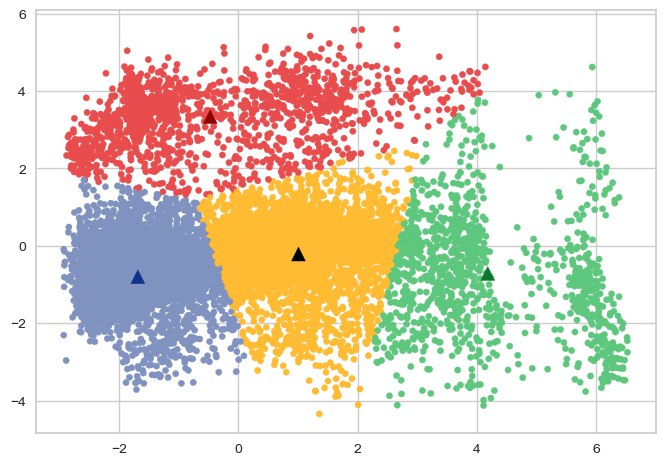

In [14]:
# O número K de centróides será 4, pois performou bem em ambas as validações

kmeans = KMeans(n_clusters=4, random_state=42)
predictions = kmeans.fit_predict(X)

centroids = kmeans.cluster_centers_

centroid_x = [centroid[0] for centroid in centroids] # eixo x
centroid_y = [centroid[1] for centroid in centroids] # eixo y

cluster_color = {
    0: '#8092bf', # azul
    1: '#5dc87d', # verde
    2: '#e94c4c', # vermelho
    3: '#ffbb31' # amarelo
}

plt.scatter(
    [element[0] for element in X], 
    [element[1] for element in X], 
    c=list(map(lambda x: cluster_color[x], predictions)),
    s=20,
)
plt.scatter(centroid_x, centroid_y, marker='^', c=['#0f338a', '#0e772e', '#8e0000', '#000'], s=100)

### Análise dos Grupos

In [15]:
# Vamos separar o dataset em duas variáveis para melhor compreensão dos resultados e suas informações

df_clean_1 = df.loc[:, ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrition_Flag_Existing Customer',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K']]

In [16]:
df_clean_1['Group'] = predictions

In [17]:
df_clean_1.groupby('Group').mean()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K
Group,,,,,,,,,,,,,,,,,,,,
0,46.411134,2.290007,35.930585,3.923829,2.287445,2.296995,3721.707664,1282.587701,2439.119963,0.771994,4449.863732,69.972746,0.754283,0.417885,0.993944,0.000000,0.209178,0.001631,0.000000,0.636618
1,46.036004,2.589559,35.717372,3.343834,2.266427,2.408641,29254.267327,1225.245725,28029.021602,0.768477,6698.123312,75.824482,0.723828,0.044752,0.900990,0.279928,0.073807,0.162916,0.409541,0.013501
2,47.208163,2.370068,36.754422,3.365986,2.711565,3.019728,6090.933537,623.719728,5467.213810,0.671699,2586.263265,42.249660,0.527710,0.169541,0.028571,0.065306,0.180952,0.112245,0.124490,0.396599
3,45.913926,2.326468,35.624347,4.027667,2.270212,2.425146,9217.135198,1227.037504,7990.097694,0.780994,4381.646173,64.581310,0.736131,0.212394,0.980633,0.098371,0.167230,0.322472,0.275745,0.070704


In [18]:
columns = df.columns.drop(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrition_Flag_Existing Customer',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K', 'Gender_F', 'Income_Category_Unknown',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K'])

In [19]:
df_clean_2 = df.loc[:, columns]

df_clean_2['Group'] = predictions

In [20]:
df_clean_2.groupby('Group').mean()

,Attrition_Flag_Attrited Customer,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
Group,,,,,,,,,,,,,,,,,
0,0.006056,0.059399,0.100862,0.042162,0.315397,0.195434,0.049150,0.146751,0.150245,0.071046,0.472630,0.388307,0.068018,1.000000,0.000000,0.000000,0.000000
1,0.099010,0.921692,0.105311,0.039604,0.309631,0.189919,0.056706,0.154815,0.144014,0.087309,0.388839,0.429343,0.094509,0.537354,0.082808,0.014401,0.365437
2,0.971429,0.398639,0.096599,0.059864,0.297279,0.193878,0.053061,0.140816,0.158503,0.072109,0.458503,0.393197,0.076190,0.991156,0.000680,0.000680,0.007483
3,0.019367,0.892714,0.098678,0.042422,0.305257,0.208423,0.050415,0.146941,0.147864,0.073778,0.477098,0.375346,0.073778,0.949585,0.007070,0.000922,0.042422


## Observações rápidas sobre os Grupos

#### Grupo 0

- Renda mais baixa
- Maior utilização do cartão
- Mais mulheres
- Menor Limite
- Orçamento disponível para compras menor

#### Grupo 1

- Renda mais alta
- Menor utilização do cartão
- Maior limite
- Melhores cartões
- Mais homens
- Orçamento disponível para compras maior

#### Grupo 2

- Mair indíce de churn
- Menor capital transacionado
- Menor quantidade de transações

#### Grupo 3

- Lembra o grupo 1, porém em uma escala de valores menores